In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '61f7be3e-5726-4030-9184-b85ba42c7162',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-06-21T17:54:14.842Z', 'error_code': 0, 'error_message': None, 'elapsed': 40, 'credit_count': 1, 'notice': None, 'total_count': 10127}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11132, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt 

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
df=pd.json_normalize(data['data'])
df["time_stamp"]=pd.to_datetime("now")

In [4]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,time_stamp
0,1,Bitcoin,BTC,bitcoin,11132,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971508e+07,1.971508e+07,False,NaN,1,NaN,NaN,None,2024-06-21T17:53:00.000Z,63761.524508,2.625944e+10,7.6956,0.134585,-1.570439,-2.476989,-8.743200,-4.570217,-2.956955,1.257063e+12,54.0599,1.338992e+12,None,2024-06-21T17:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 20:54:14.705604
1,1027,Ethereum,ETH,ethereum,9077,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.222767e+08,1.222767e+08,True,NaN,2,NaN,NaN,None,2024-06-21T17:52:00.000Z,3483.657745,1.540100e+10,-5.0532,-0.097629,-0.844511,2.813770,-6.938720,8.448367,2.332586,4.259703e+11,18.3205,4.259703e+11,None,2024-06-21T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 20:54:14.705604
2,825,Tether USDt,USDT,tether,89295,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.128914e+11,1.160820e+11,True,NaN,3,NaN,NaN,None,2024-06-21T17:52:00.000Z,0.999157,5.246818e+10,0.6282,-0.010883,-0.000912,-0.044002,-0.065132,-0.148836,-0.107345,1.127962e+11,4.8508,1.159841e+11,None,2024-06-21T17:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-21 20:54:14.705604
3,1839,BNB,BNB,bnb,2186,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475660e+08,1.475660e+08,False,NaN,4,NaN,NaN,None,2024-06-21T17:52:00.000Z,582.262770,1.760611e+09,1.9207,-0.216383,-2.090340,-1.980987,-5.653161,-2.923296,3.496243,8.592221e+10,3.6951,8.592221e+10,None,2024-06-21T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 20:54:14.705604
4,5426,Solana,SOL,solana,690,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.620075e+08,5.786205e+08,True,NaN,5,NaN,NaN,None,2024-06-21T17:52:00.000Z,129.832921,2.033654e+09,-19.4553,-0.785086,-3.135870,-8.196165,-28.033132,-16.669891,-26.207403,5.998378e+10,2.5796,7.512399e+10,None,2024-06-21T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 20:54:14.705604
5,3408,USDC,USDC,usd-coin,19833,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.272228e+10,3.272228e+10,False,NaN,6,NaN,NaN,None,2024-06-21T17:52:00.000Z,0.999956,5.589634e+09,10.1262,0.004851,0.004086,-0.020057,0.004823,-0.026879,-0.014951,3.272083e+10,1.4072,3.272083e+10,None,2024-06-21T17:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-21 20:54:14.705604
6,52,XRP,XRP,xrp,1342,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.561819e+10,9.998751e+10,False,NaN,7,NaN,NaN,None,2024-06-21T17:53:00.000Z,0.481231,1.086752e+09,-6.4769,-0.186707,-2.091852,2.755854,-9.462253,-11.892652,-23.563644,2.676522e+10,1.1510,4.812314e+10,None,2024-06-21T17:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 20:54:14.705604
7,74,Dogecoin,DOGE,dogecoin,1009,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.448036e+11,1.448036e+11,True,NaN,8,NaN,NaN,None,2024-06-21T17:53:00.000Z,0.122975,5.875756e+08,-20.2154,-0.442311,-0.777211,-8.122737,-26.015865,-23.851342,-28.816922,1.780721e+10,0.7658,1.780721e+10,None,2024-06-21T17:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 20:54:14.705604
8,11419,Toncoin,TON,toncoin,430,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN

In [5]:
def api_runner():
        global df
        url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
        parameters = {
          'start':'1',
          'limit':'15',
          'convert':'USD'
        }
        headers = {
          'Accepts': 'application/json',
          'X-CMC_PRO_API_KEY': '61f7be3e-5726-4030-9184-b85ba42c7162',
        }

        session = Session()
        session.headers.update(headers)

        try:
          response = session.get(url, params=parameters)
          data = json.loads(response.text)
          print(data)
        except (ConnectionError, Timeout, TooManyRedirects) as e:
          print(e)


        df2 = pd.json_normalize(data['data'])
        df2['time_stamp'] = pd.to_datetime('now')
        df = pd.concat([df, df2], ignore_index=True)


In [6]:
import os 
from time import time
from time import sleep

for i in range(200):
    api_runner()
    print('API Runner completed')
    sleep(60) 
exit()

{'status': {'timestamp': '2024-06-21T17:54:16.793Z', 'error_code': 0, 'error_message': None, 'elapsed': 23, 'credit_count': 1, 'notice': None, 'total_count': 10127}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11132, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

{'status': {'timestamp': '2024-06-21T17:55:17.636Z', 'error_code': 0, 'error_message': None, 'elapsed': 31, 'credit_count': 1, 'notice': None, 'total_count': 10127}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11132, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

{'status': {'timestamp': '2024-06-21T17:56:18.448Z', 'error_code': 0, 'error_message': None, 'elapsed': 36, 'credit_count': 1, 'notice': None, 'total_count': 10127}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11132, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

KeyboardInterrupt: 

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,time_stamp
0,1,Bitcoin,BTC,bitcoin,11132,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971508e+07,1.971508e+07,False,NaN,1,NaN,NaN,None,2024-06-21T17:53:00.000Z,63761.524508,2.625944e+10,7.6956,0.134585,-1.570439,-2.476989,-8.743200,-4.570217,-2.956955,1.257063e+12,54.0599,1.338992e+12,None,2024-06-21T17:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 20:54:14.705604
1,1027,Ethereum,ETH,ethereum,9077,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.222767e+08,1.222767e+08,True,NaN,2,NaN,NaN,None,2024-06-21T17:52:00.000Z,3483.657745,1.540100e+10,-5.0532,-0.097629,-0.844511,2.813770,-6.938720,8.448367,2.332586,4.259703e+11,18.3205,4.259703e+11,None,2024-06-21T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 20:54:14.705604
2,825,Tether USDt,USDT,tether,89295,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.128914e+11,1.160820e+11,True,NaN,3,NaN,NaN,None,2024-06-21T17:52:00.000Z,0.999157,5.246818e+10,0.6282,-0.010883,-0.000912,-0.044002,-0.065132,-0.148836,-0.107345,1.127962e+11,4.8508,1.159841e+11,None,2024-06-21T17:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-21 20:54:14.705604
3,1839,BNB,BNB,bnb,2186,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475660e+08,1.475660e+08,False,NaN,4,NaN,NaN,None,2024-06-21T17:52:00.000Z,582.262770,1.760611e+09,1.9207,-0.216383,-2.090340,-1.980987,-5.653161,-2.923296,3.496243,8.592221e+10,3.6951,8.592221e+10,None,2024-06-21T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 20:54:14.705604
4,5426,Solana,SOL,solana,690,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.620075e+08,5.786205e+08,True,NaN,5,NaN,NaN,None,2024-06-21T17:52:00.000Z,129.832921,2.033654e+09,-19.4553,-0.785086,-3.135870,-8.196165,-28.033132,-16.669891,-26.207403,5.998378e+10,2.5796,7.512399e+10,None,2024-06-21T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 20:54:14.705604
5,3408,USDC,USDC,usd-coin,19833,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.272228e+10,3.272228e+10,False,NaN,6,NaN,NaN,None,2024-06-21T17:52:00.000Z,0.999956,5.589634e+09,10.1262,0.004851,0.004086,-0.020057,0.004823,-0.026879,-0.014951,3.272083e+10,1.4072,3.272083e+10,None,2024-06-21T17:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-21 20:54:14.705604
6,52,XRP,XRP,xrp,1342,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.561819e+10,9.998751e+10,False,NaN,7,NaN,NaN,None,2024-06-21T17:53:00.000Z,0.481231,1.086752e+09,-6.4769,-0.186707,-2.091852,2.755854,-9.462253,-11.892652,-23.563644,2.676522e+10,1.1510,4.812314e+10,None,2024-06-21T17:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 20:54:14.705604
7,74,Dogecoin,DOGE,dogecoin,1009,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.448036e+11,1.448036e+11,True,NaN,8,NaN,NaN,None,2024-06-21T17:53:00.000Z,0.122975,5.875756e+08,-20.2154,-0.442311,-0.777211,-8.122737,-26.015865,-23.851342,-28.816922,1.780721e+10,0.7658,1.780721e+10,None,2024-06-21T17:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 20:54:14.705604
8,11419,Toncoin,TON,toncoin,430,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN

In [8]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,time_stamp
0,1,Bitcoin,BTC,bitcoin,11132,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19715075.00000,19715075.00000,False,NaN,1,NaN,NaN,None,2024-06-21T17:53:00.000Z,63761.52451,26259443773.61150,7.69560,0.13459,-1.57044,-2.47699,-8.74320,-4.57022,-2.95695,1257063237786.33130,54.05990,1338992014664.56006,None,2024-06-21T17:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 20:54:14.705604
1,1027,Ethereum,ETH,ethereum,9077,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122276728.43750,122276728.43750,True,NaN,2,NaN,NaN,None,2024-06-21T17:52:00.000Z,3483.65775,15401001599.79837,-5.05320,-0.09763,-0.84451,2.81377,-6.93872,8.44837,2.33259,425970272115.06152,18.32050,425970272115.06000,None,2024-06-21T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 20:54:14.705604
2,825,Tether USDt,USDT,tether,89295,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112891354601.68275,116081999193.07195,True,NaN,3,NaN,NaN,None,2024-06-21T17:52:00.000Z,0.99916,52468183180.34431,0.62820,-0.01088,-0.00091,-0.04400,-0.06513,-0.14884,-0.10735,112796171780.24721,4.85080,115984126222.73000,None,2024-06-21T17:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-21 20:54:14.705604
3,1839,BNB,BNB,bnb,2186,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147566038.06970,147566038.06970,False,NaN,4,NaN,NaN,None,2024-06-21T17:52:00.000Z,582.26277,1760610640.03897,1.92070,-0.21638,-2.09034,-1.98099,-5.65316,-2.92330,3.49624,85922210106.94084,3.69510,85922210106.94000,None,2024-06-21T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 20:54:14.705604
4,5426,Solana,SOL,solana,690,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,462007507.10496,578620513.87003,True,NaN,5,NaN,NaN,None,2024-06-21T17:52:00.000Z,129.83292,2033653711.62447,-19.45530,-0.78509,-3.13587,-8.19617,-28.03313,-16.66989,-26.20740,59983784336.86758,2.57960,75123991673.53999,None,2024-06-21T17:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 20:54:14.705604
5,3408,USDC,USDC,usd-coin,19833,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32722278031.09468,32722278031.09468,False,NaN,6,NaN,NaN,None,2024-06-21T17:52:00.000Z,0.99996,5589633627.51463,10.12620,0.00485,0.00409,-0.02006,0.00482,-0.02688,-0.01495,32720830810.08271,1.40720,32720830810.08000,None,2024-06-21T17:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-21 20:54:14.705604
6,52,XRP,XRP,xrp,1342,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55618185850.00000,99987512072.00000,False,NaN,7,NaN,NaN,None,2024-06-21T17:53:00.000Z,0.48123,1086751608.33280,-6.47690,-0.18671,-2.09185,2.75585,-9.46225,-11.89265,-23.56364,26765215195.88125,1.15100,48123135961.44000,None,2024-06-21T17:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 20:54:14.705604
7,74,Dogecoin,DOGE,dogecoin,1009,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144803576383.70520,144803576383.70526,True,NaN,8,NaN,NaN,None,2024-06-21T17:53:00.000Z,0.12297,587575574.58081,-20.21540,-0.44231,-0.77721,-8.12274,-26.01587,-23.85134,-28.81692,17807208736.79621,0.76580,17807208736.80000,None,2024-06-21T17:53:00.

In [10]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.12394,-1.58084,-2.49649,-8.72802,-4.53789,-2.92874
Ethereum,-0.09741,-0.80556,2.83021,-6.91040,8.47667,2.39157
Tether USDt,-0.01299,-0.00268,-0.03307,-0.06780,-0.14092,-0.10179
BNB,-0.18419,-2.05073,-1.94781,-5.58596,-2.90341,3.53639
Solana,-0.77586,-3.10621,-8.19925,-28.01562,-16.67837,-26.19358
USDC,0.00317,0.00531,-0.00756,0.00168,-0.01962,-0.01149
XRP,-0.18474,-2.09514,2.75092,-9.45772,-11.89529,-23.54182
Dogecoin,-0.42188,-0.77794,-8.08198,-25.98852,-23.83311,-28.77936
Toncoin,-1.08981,-0.76239,-10.31788,7.67736,17.78356,34.58788


In [11]:
df3 = df3.stack()
df3

name                                     
Bitcoin      quote.USD.percent_change_1h      0.12394
             quote.USD.percent_change_24h    -1.58084
             quote.USD.percent_change_7d     -2.49649
             quote.USD.percent_change_30d    -8.72802
             quote.USD.percent_change_60d    -4.53789
             quote.USD.percent_change_90d    -2.92874
Ethereum     quote.USD.percent_change_1h     -0.09741
             quote.USD.percent_change_24h    -0.80556
             quote.USD.percent_change_7d      2.83021
             quote.USD.percent_change_30d    -6.91040
             quote.USD.percent_change_60d     8.47667
             quote.USD.percent_change_90d     2.39157
Tether USDt  quote.USD.percent_change_1h     -0.01299
             quote.USD.percent_change_24h    -0.00268
             quote.USD.percent_change_7d     -0.03307
             quote.USD.percent_change_30d    -0.06780
             quote.USD.percent_change_60d    -0.14092
             quote.USD.percent_change_90

In [12]:
df3 = df3.to_frame(name='values')

In [13]:
df3

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.12394
            quote.USD.percent_change_24h  -1.58084
            quote.USD.percent_change_7d   -2.49649
            quote.USD.percent_change_30d  -8.72802
            quote.USD.percent_change_60d  -4.53789
            quote.USD.percent_change_90d  -2.92874
Ethereum    quote.USD.percent_change_1h   -0.09741
            quote.USD.percent_change_24h  -0.80556
            quote.USD.percent_change_7d    2.83021
            quote.USD.percent_change_30d  -6.91040
            quote.USD.percent_change_60d   8.47667
            quote.USD.percent_change_90d   2.39157
Tether USDt quote.USD.percent_change_1h   -0.01299
            quote.USD.percent_change_24h  -0.00268
            quote.USD.percent_change_7d   -0.03307
            quote.USD.percent_change_30d  -0.06780
            quote.USD.percent_change_60d  -0.14092
            quote.USD.percent_change_90d  -0.10179
BNB         quote.USD.percent_change_1h   -0.18419
            quote.USD.percent_change_24h  -2.05073
            quote.USD.percent_change_7d   -1.94781
            quote.USD.percent_change_30d  -5.58596
            quote.USD.percent_change_60d  -2.90341
            quote.USD.percent_change_90d   3.53639
Solana      quote.USD.percent_change_1h   -0.77586
            quote.USD.percent_change_24h  -3.10621
            quote.USD.percent_change_7d   -8.19925
            quote.USD.percent_change_30d -28.01562
            quote.USD.percent_change_60d -16.67837
            quote.USD.percent_change_90d -26.19358
USDC        quote.USD.percent_change_1h    0.00317
            quote.USD.percent_change_24h   0.00531
            quote.USD.percent_change_7d   -0.00756
            quote.USD.percent_change_30d   0.00168
            quote.USD.percent_change_60d  -0.01962
            quote.USD.percent_change_90d  -0.01149
XRP         quote.USD.percent_change_1h   -0.18474
            quote.USD.percent_change_24h  -2.09514
            quote.USD.percent_change_7d    2.75092
            quote.USD.percent_change_30d  -9.45772
            quote.USD.percent_change_60d -11.89529
            quote.USD.percent_change_90d -23.54182
Dogecoin    quote.USD.percent_change_1h   -0.42188
            quote.USD.percent_change_24h  -0.77794
            quote.USD.percent_change_7d   -8.08198
            quote.USD.percent_change_30d -25.98852
            quote.USD.percent_change_60d -23.83311
            quote.USD.percent_change_90d -28.77936
Toncoin     quote.USD.percent_change_1h   -1.08981
            quote.USD.percent_change_24h  -0.76239
            quote.USD.percent_change_7d  -10.31788
            quote.USD.percent_change_30d   7.67736
            quote.USD.percent_change_60d  17.78356
            quote.USD.percent_change_90d  34.58788
Cardano     quote.USD.percent_change_1h   -0.93664
            quote.USD.percent_change_24h  -1.77847
            quote.USD.percent_change_7d   -7.17900
            quote.USD.percent_change_30d -21.90698
            quote.USD.percent_change_60d -27.38853
            quote.USD.percent_change_90d -40.54672
Avalanche   quote.USD.percent_change_1h   -0.55342
            quote.USD.percent_change_24h  -1.51929
            quote.USD.percent_change_7d   -8.65280
            quote.USD.percent_change_30d -31.99977
            quote.USD.percent_change_60d -30.96430
            quote.USD.percent_change_90d -50.69500
Shiba Inu   quote.USD.percent_change_1h   -0.56427
            quote.USD.percent_change_24h  -3.36629
            quote.USD.percent_change_7d  -11.78194
            quote.USD.percent_change_30d -31.33175
            quote.USD.percent_change_60d -34.64882
            quote.USD.percent_change_90d -37.64076
TRON        quote.USD.percent_change_1h   -0.30422
            quote.USD.percent_change_24h   1.09706
            quote.USD.percent_change_7d    1.75336
            quote.USD.percent_change_30d  -2.36589
            quote.USD.percent_change_60d   5.38792
            quo

In [15]:
df3.reset_index(inplace=True)

In [16]:
df3

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.12394
1,Bitcoin,quote.USD.percent_change_24h,-1.58084
2,Bitcoin,quote.USD.percent_change_7d,-2.49649
3,Bitcoin,quote.USD.percent_change_30d,-8.72802
4,Bitcoin,quote.USD.percent_change_60d,-4.53789
5,Bitcoin,quote.USD.percent_change_90d,-2.92874
6,Ethereum,quote.USD.percent_change_1h,-0.09741
7,Ethereum,quote.USD.percent_change_24h,-0.80556
8,Ethereum,quote.USD.percent_change_7d,2.83021
9,Ethereum,quote.USD.percent_change_30d,-6.91040


In [18]:
df3 = df3.rename(columns={'level_1': 'percent_change'})
df3

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.12394
1,Bitcoin,quote.USD.percent_change_24h,-1.58084
2,Bitcoin,quote.USD.percent_change_7d,-2.49649
3,Bitcoin,quote.USD.percent_change_30d,-8.72802
4,Bitcoin,quote.USD.percent_change_60d,-4.53789
5,Bitcoin,quote.USD.percent_change_90d,-2.92874
6,Ethereum,quote.USD.percent_change_1h,-0.09741
7,Ethereum,quote.USD.percent_change_24h,-0.80556
8,Ethereum,quote.USD.percent_change_7d,2.83021
9,Ethereum,quote.USD.percent_change_30d,-6.91040


In [22]:
df3['percent_change'] = df3['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df3

,name,percent_change,values
0,Bitcoin,1h,0.12394
1,Bitcoin,24h,-1.58084
2,Bitcoin,7d,-2.49649
3,Bitcoin,30d,-8.72802
4,Bitcoin,60d,-4.53789
5,Bitcoin,90d,-2.92874
6,Ethereum,1h,-0.09741
7,Ethereum,24h,-0.80556
8,Ethereum,7d,2.83021
9,Ethereum,30d,-6.91040


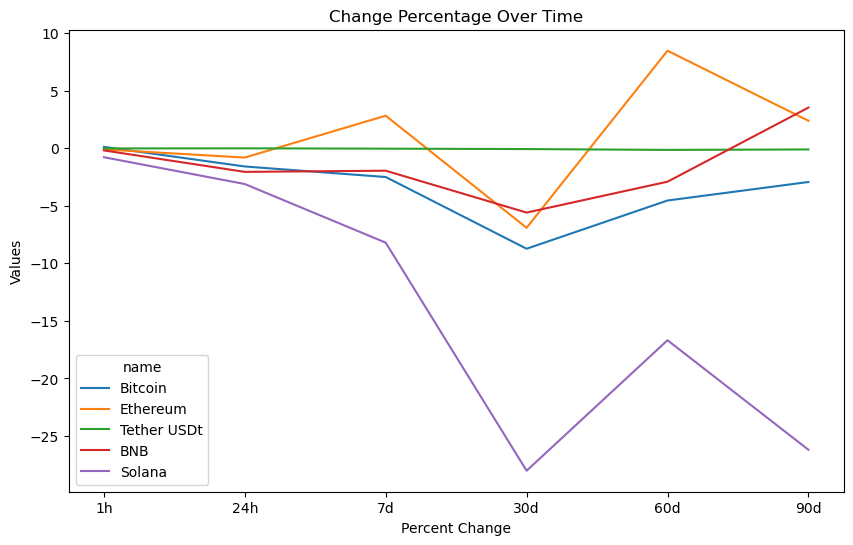

In [48]:
cryptocurrencies = df3['name'].unique()[:5]
df_filtered = df3[df3['name'].isin(cryptocurrencies)]
sns.lineplot(x='percent_change', y='values', hue='name', data=df_filtered)
plt.title('Change Percentage Over Time')
plt.xlabel('Percent Change')
plt.ylabel('Values')
plt.gcf().set_size_inches(10, 6)